# Machine Learning Basics:

## Linear Regression

The objective of linear regression is to find a hypothesis $ h $ that best maps the input vector $ x = <x_1, x_2, x_3> $ to a target vector $ t $ that is continuous. If we assume h is linear then:

$$ y(x,w) = w_0 + w_1x_1 + ... w_Mx_M = w^T \begin{pmatrix} 1 \\ x \end{pmatrix} $$

This hypothesis function is derived from the making use of Bayes Rule: 

$ 
P(H|e) = \frac{P(e|H)P(H)}{P(e)} \\
$
where 

$P(H|e)$ = posterior probability  
$P(e|H)$ = likelihood  
$P(H)$ = prior probability  
$P(e)$ = evidence probability = $\sum_{j=0}^{j=n}P(e|H_j)P(H_j)$ and is also a normalizing constant

Therefore we can simplify Bayes Rule to obtain:

$ P(H|e) \propto k{P(e|H)P(H)} $
where 

$k = \frac{1}{\sum_{j=0}^{j=n}P(e|H_j)P(H_j)}$

Here the probability of each hypothesis $H$ is evaluated given the evidence $e$ which is equivalent the tuple of our input data points $ x = <(x_1,t_1) (x_2,t_2)...(x_n,t_n)> $

The posterior probability estimation for linear regression diverge into two approaches. Both approaches involve 
identifying the 
conditional probability model that best fits a given dataset. 

**NOTE**: In both approaches, the assumption is made that the input space $x$ is known and the conditional probability 
is defined for the outputs $y$ given $\theta$ 



* Frequentist Approach

In the frequentist approach the evaluation of the hypothesis relies completely on the evidence provided and does not rely on any prior belief of the model. Therefore in this model it is assumed that each hypothesis $H$ is equally likely. Therefore the Bayes Rule simplifies to:

$ 
P(H|e) \propto kP(e|H)
$

$k = \frac{1}{\sum_{j=0}^{j=n}P(e|H_j)}$

As a result, the objective of linear regression simplifies to finding a hypothesis (and its corresponding parameters) that best fits the evidence by maximizing the probability $P(e|H)$. This is known as maximum likelihood. Assuming the hypothesis is defined by a parameter $\theta$, we have:

$P(\theta|y,x) = \frac{P(x,y,\theta)}{P(y,x)} = \frac{P(y|\theta,x)P(\theta,x)}{P(y,x)} = \frac{P(y|\theta,x)P(\theta
)P(x)}{P(y|x)P(x)}$

$$P(\theta|y,x) = \frac{P(y|\theta,x)P(\theta)}{P(y|x)}$$

$P(\theta|y,x)  \propto P(y|\theta,x)$

To obtain $\theta$ then:

$\theta_{MLE} = \max_{\theta}P(y|\theta,x)$

The $\theta_{MLE}$ 

* Bayesian Approach

In the bayesian approach the evaluation of the hypothesis relies on both the likelihood and a prior belief about the hypothesis. There are two ways to go about this:

- Maximum A Posteri

In this approach, we define the posterior probability by maximizing the likelihood that is influenced by a prior belief to identify the best possible hypothesis function

$P(\theta|y,x)  \propto P(y|\theta,x)P(\theta)$

To obtain $\theta$ then:

$\theta_{MAP} = \max_{\theta}P(y|\theta,x)P(\theta)$

- Bayesian Learning

In this approach instead of finding a unique posterior probability, the posterior 
is left as a distribution and the predictions are evaluated based on the entire distribution. The weighted 
probability is then evaluated as:

$P(\theta|y,x) = P(y|\theta,x)P(\theta)$

$P(y^*|\theta,x^*) = \int_{0}^{\theta}P(y^*|\theta,x^*)P(\theta|y,x)d\theta$
  

### Examples: 

Lets begin with a sample dataset through which we wish to fit a linear equation

48.100765678773406


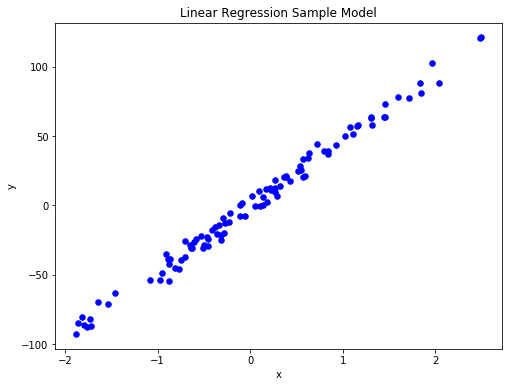

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
import random

X, y, coef = datasets.make_regression(n_samples=100, n_features=1, noise=5, random_state=random.randint(1,1000), 
                                      coef=True)
print(coef)
#X = X / max(abs(X))
#y = y / max(abs(y))
X = np.stack(( np.ones(X.shape[0]), X[:, 0]), axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
fig = plt.figure(figsize=(8, 6))
plt.scatter(X[:, 1], y, color="b", marker="o", s=30)
plt.title("Linear Regression Sample Model")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

If we assume that each data point $y_i$ is conditionally independent given $\theta$ and known $x_i$, then the 
probability $P(y|x,\theta)$ is the product of the individual probabilities $P(y_i|x_i,\theta)$ of each data point:

$\mathcal{L}(\theta) = P(y|\theta,x) = \prod_{0}^{m}P(y_i|\theta,x_{i})$ 

This is known as the **likelihood function** 

We can now assume the three approaches discussed above. For linear regression, we first assume that the conditional 
probability model for each point can be represented as a gaussian distribution. Therefore the likelihood function can
 be given by:


$\mathcal{L}(\theta) =\prod_{0}^{m} \mathcal{N}(y_{i}|\theta^T x_{i},\sigma^2)=\prod_{0}^{m}  \frac{1}{\sqrt{
(2\pi\sigma^2)}
}e^{-\frac{1}{2\sigma^2}(y_i-\theta^T x_i)^2} $

In [2]:
# import math
# import scipy.stats as stats
# 
# sigma = 0.25*(y.max()-y.min())
# normals = []
# scale = 0.9
# fig = plt.figure(figsize=(15, 15))
# y_sample = np.linspace(5*y.min(), 5*y.max(), 100000)
# ϴ = np.linspace(coef - coef*scale, coef + coef*scale, 15)
# for i in range(0,len(ϴ)):
#     #fig = plt.figure(figsize=(8, 6))
#     P_y_ϴix = 1
#     normals = []
#     for j in range(0,len(X[:,1])):
#         P_y_ϴix = P_y_ϴix * stats.norm.pdf(y_sample,ϴ[i]*X[j,1], sigma)
#     plt.plot(y_sample, P_y_ϴix ,label='ϴ = {0}, y_mean = {1}'.format(np.round(ϴ[i],2),np.round(y_sample[np.argmax(P_y_ϴix)],5)))
#     plt.legend()
#     
# normals = []    
# real_P_y = 1
# fig = plt.figure(figsize=(15, 15))
# for j in range(0,len(y)):
#     normals.append(stats.norm.pdf(y_sample, y[j], sigma))
#     #plt.plot(y_sample, stats.norm.pdf(y_sample, y[j], sigma))
# for k in normals:
#     real_P_y = real_P_y * k 
# plt.plot(y_sample, real_P_y, label='ϴ (real_distribution) = {0}, y_mean = {1}'.format(np.round(coef,2),np.round(y_sample[np.argmax(real_P_y)],5)))
# plt.legend()
# plt.show()

### Maximum likelihood

$\theta_{MLE} = \max_{\theta}\mathcal{L}(\theta) = \max_{\theta}\prod_{0}^{m}  \frac{1}{\sqrt{(2\pi\sigma^2)}
}e^{-\frac{1}{2\sigma^2}
(y_i-\theta^T 
x_i)
^2}$

We first see where $\theta_{MLE}$ is by maximizing the likelihood. Since this is an exponential function we can 
convert the product of exponents to sum by taking the logarithm on both sides, since optimum solution for 
$\theta_{MLE}$ is exists the same for both. This is known as **log likelihood**

$\max_{\theta}\log(\mathcal{L}(\theta)) = \max_{\theta}( \log(\prod_{0}^{m}  \frac{1}{\sqrt{(2\pi\sigma^2)}
}e^{-\frac{1}{2\sigma^2}(y_i-\theta^T x_i)^2}) = \sum_{0}^{m}\log(\frac{1}{\sqrt{(2\pi\sigma^{2}})})+\sum_{0}^{m}\log
(e^{-\frac{1}{2\sigma^2}(y_i-\theta^T x_i)^2}))$

we can bucket all the terms that are independent of $\theta$:

$\max_{\theta}\log(\mathcal{L}(\theta)) = \max_{\theta}(const-\sum_{0}^{m}\frac{1}{2\sigma^2}(y_i-\theta^T x_i)^2)$
$\max_{\theta}\log(\mathcal{L}(\theta)) = -\max_{\theta}(\sum_{0}^{m}(y_i-\theta^T x_i)^2)$

The maximization of the log likelihood is the minimization of the negative log likelihood. So to simplify the signs:

$\max_{\theta}\log(\mathcal{L}(\theta)) = \min_{\theta}(\sum_{0}^{m}(y_i-\theta^T x_i)^2)$

This final result can be thought of as a measurement of the loss we are trying to minimize. This is known as the 
**loss function**:

$E(\theta) = \sum_{0}^{m}(y_i-\theta^T x_i)^2$

We can minimize this by taking the deravative with respect to $\theta$ and setting it to zero:

$\frac{dE}{d\theta} = \sum_{0}^{m}x_{i}(y_{i}-\theta^T x_{i}) = X^{T}(Y-\theta^{T}X) = 0$

$\theta = \frac{\sum_{0}^{m}x_{i}y_{i}}{\sum_{0}^{m} x_{i}^2} = (X^T X)^{-1}X^{T}Y$

* where $(X^T X)^{-1}X^{T} $ is the pseudo-inverse of $X$

Alternatively if a clean closed form solution does not exist we can make use of gradient descent to iteratively 
arrive at the solution using gradient descent:

$\theta_{new} = \theta_{old} - \frac{dE}{d\theta}  $

weights   (direct): [ 0.1227348  91.96221493]
weights (iterated): [ 0.1227348  91.96221493]


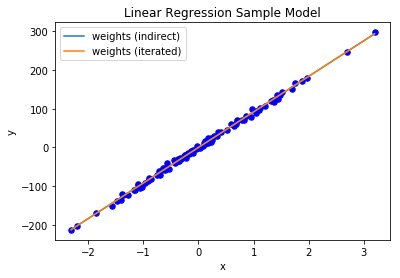

In [3]:
## Direct Evaluation
direct_weights = np.dot(np.linalg.pinv(X),y)

print('weights   (direct): {0}'.format(direct_weights))
## Gradient Descent Evaluation
n_samples, n_features = X.shape
gradient_descent_weights = np.zeros(n_features)
lr=0.01
for _ in range(10000):
    y_predicted = np.dot(X, gradient_descent_weights)  # + self.bias
    dw = np.dot(X.T, (y_predicted - y))
    # db = (1/n_samples) * np.sum((y_predicted-y))
    gradient_descent_weights -= lr * dw
    # self.bias -= self.lr * db

gradient_descent_weights

print('weights (iterated): {0}'.format(gradient_descent_weights))
#X = X / max(abs(X))
#y = y / max(abs(y))
x_sample = np.vstack((np.ones(len(np.linspace(X.min(), X.max(), 100))),np.linspace(X.min(), X.max(), 100))).T
plt.scatter(X[:, 1], y, color="b", marker="o", s=30)
plt.plot(x_sample[:,1], np.dot(x_sample , direct_weights.T), label='weights (indirect)')
plt.plot(x_sample[:,1], np.dot(x_sample , gradient_descent_weights.T), label='weights (iterated)')
plt.title("Linear Regression Sample Model")
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Maximum A Posteri

Next we see the estimate for $\theta_{MAP}$ which is given by:

$\theta_{MAP} = \max_{\theta}P(y|\theta,x)P(\theta)$

where 

* $P(y|\theta,x) = \mathcal{L}(\theta)$
* $P(\theta) = \mathcal{N}(\theta|0,\Sigma)$

$\theta_{MAP} = \max_{\theta}\mathcal{L}(\theta)P(\theta) =  \max_{\theta}\prod_{0}^{m}  (\frac{1}{\sqrt{
(2\pi\sigma^2)}}
e^{-\frac{1}{2\sigma^2}(y_i-\theta^T x_i)^2}) * \frac{1}{\sqrt{(2\pi\Sigma)}}
e^{-\frac{1}{2}(\theta-\mu_{w})^T\Sigma^{-1}(\theta-\mu_{w})}$

As before we convert the product of exponents to sum by taking the logarithm on both sides:

$\max_{\theta}\log(\mathcal{L}(\theta)) = \max_{\theta}( \log(\prod_{0}^{m}(\frac{1}{\sqrt{(2\pi\sigma^2)}}
e^{-\frac{1}{2\sigma^2}(y_i-\theta^T x_i)^2}) * \frac{1}{\sqrt{(2\pi\Sigma)}}
e^{-\frac{1}{2}(\theta-\mu_{w})^T\Sigma^{-1}(\theta-\mu_{w})}$

we can bucket all the terms that are independent of $\theta$:

$\max_{\theta}\log(\mathcal{L}(\theta)) = \max_{\theta}(const-\sum_{0}^{m}\frac{1}{2\sigma^2}(y_i-\theta^T x_i)^2) -\frac{1}{2}(\theta-\mu_{w})^T\Sigma^{-1}(\theta-\mu_{w}))$
$\max_{\theta}\log(\mathcal{L}(\theta)) = -\max_{\theta}(\sum_{0}^{m}(y_i-\theta^T x_i)^2 +\frac{1}{2}
(\theta-\mu_{w})^T\Sigma^{-1}(\theta-\mu_{w}))$

The maximization of the log posterior is the minimization of the negative posterior. So to simplify the signs:

$\max_{\theta}\log(\mathcal{L}(\theta)) = \min_{\theta}((\sum_{0}^{m}(y_i-\theta^T x_i)^2)
+(\theta-\mu_{w})^T\Sigma^{-1}(\theta-\mu_{w}))$

This final result can be thought of as a measurement of the loss we are trying to minimize. This is known as the 
**loss function**:

$E(\theta) = \sum_{0}^{m}((y_i-\theta^T x_i)^2) +(\theta-\mu_{w})^T\Sigma^{-1}(\theta-\mu_{w})$

$E(\theta) = (Y-X\theta)^{T}(Y-X\theta) +(\theta-\mu_{w})^T\Sigma^{-1}(\theta-\mu_{w})$

$E(\theta) = Y^{T}Y - Y^{T}X\theta - \theta^{T} X^{T}Y + \theta^{T} X^{T}X\theta + \theta^{T} \Sigma^{-1} \theta - 
\theta^{T} \Sigma^{-1} \mu_{w} - \mu_{w}^{T} \Sigma^{-1} \theta + \mu_{w}^{T} \Sigma^{-1} \mu_{w}$

$E(\theta) = Y^{T}Y - Y^{T}X\theta - (\theta^{T} X^{T}Y)^{T} + \theta^{T} X^{T}X\theta + \theta^{T} \Sigma^{-1} 
\theta - (\theta^{T} \Sigma^{-1} \mu_{w})^{T} - \mu_{w}^{T} \Sigma^{-1} \theta + \mu_{w}^{T} \Sigma^{-1} \mu_{w}$

$E(\theta) = Y^{T}Y - 2Y^{T}X\theta  + \theta^{T} X^{T}X\theta + \theta^{T} \Sigma^{-1} 
\theta - 2\mu_{w}^{T} \Sigma^{-1} \theta + \mu_{w}^{T} \Sigma^{-1} \mu_{w}$


We can minimize this by taking the deravative with respect to $\theta$ and setting it to zero:

$\frac{dE}{d\theta} = - 2Y^{T}X +  2 \theta^{T}X^{T}X + 2\theta^{T}\Sigma^{-1}  - 2 \mu_{w}^{T}\Sigma^{-1}  = 0$

removing constants

$\frac{dE}{d\theta} = - Y^{T}X +  \theta^{T}X^{T}X + \theta^{T}\Sigma^{-1}  -  \mu_{w}^{T}\Sigma^{-1}= 0$

$  \theta^{T}X^{T}X + \theta^{T}\Sigma^{-1}  = Y^{T}X -\mu_{w}^{T}\Sigma^{-1} $

$  \theta^T = (X^{T}X + \Sigma^{-1})^{-1}(Y^{T}X + \mu_{w}^{T}\Sigma^{-1}) $

* where $\lambda I = {\Sigma}^{-1}$

$\theta_{MAP} = (X^{T}X + \lambda I)^{-1}(X^{T}Y + \mu_{w} \lambda I) $

Alternatively if a clean closed form solution does not exist we can make use of gradient descent to iteratively 
arrive at the solution using gradient descent:

$ \theta_{new} = \theta_{old} - \frac{dE}{d\theta} $

weights (direct): [6.35385916e-02 9.30132744e+01]
weights (iterated): [ 0.17086656 91.06767067]


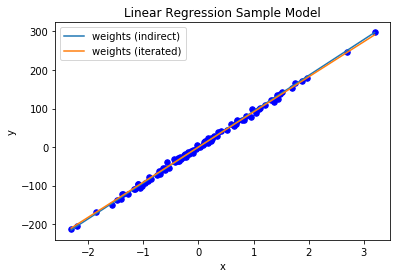

In [4]:
#function definition
dot = np.dot
inv = np.linalg.inv
## Direct Evaluation

n_samples, n_features = X.shape
λ = 1
μ_w = np.array([0, 200]).T
λ_m = λ*np.eye(n_features)
regularized_direct_weights = np.dot(inv(dot(X.T,X)+λ_m),(np.dot(X.T,y) + np.dot(μ_w,λ_m)))
print('weights (direct): {0}'.format(regularized_direct_weights))

## Gradient Descent Evaluation
regularized_gradient_descent_weights = np.zeros(n_features)
lr=0.01
for _ in range(10000):
    y_predicted = np.dot(X, regularized_gradient_descent_weights)  # + self.bias
    dw = np.dot(X.T, (y_predicted - y)) + np.dot(λ_m,regularized_gradient_descent_weights)
    # db = (1/n_samples) * np.sum((y_predicted-y))
    regularized_gradient_descent_weights -= lr * dw
    # self.bias -= self.lr * db

print('weights (iterated): {0}'.format(regularized_gradient_descent_weights))
#X = X / max(abs(X))
#y = y / max(abs(y))
x_sample = np.vstack((np.ones(len(np.linspace(X.min(), X.max(), 100))),np.linspace(X.min(), X.max(), 100))).T
plt.scatter(X[:, 1], y, color="b", marker="o", s=30)
plt.plot(x_sample[:,1], np.dot(x_sample , regularized_direct_weights.T), label='weights (indirect)')
plt.plot(x_sample[:,1], np.dot(x_sample , regularized_gradient_descent_weights.T), label='weights (iterated)')
plt.title("Linear Regression Sample Model")
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Bayesian Linear Regression

Next we find the Bayesian solution which is dependent on the entire posterior distribution of the weights

$P(\theta|y,x) = P(y|\theta,x)P(\theta)$

where 

* $P(y|\theta,x) = \mathcal{L}(\theta)$
* $P(\theta) = \mathcal{N}(\theta|0,\Sigma)$

$P(\theta|y,x) = \mathcal{L}(\theta)P(\theta) =  \prod_{0}^{m}  
(\frac{1}{\sqrt{(2\pi\sigma^2)}}
e^{-\frac{1}{2\sigma^2}(y_i-\theta^T x_i)^2}) * \frac{1}{\sqrt{(2\pi\Sigma)}}
e^{-\frac{1}{2}(\theta-\mu_{w})^T\Sigma^{-1}(\theta-\mu_{w})}$

$P(\theta|y,x) = \frac{1}{\sqrt{(2\pi\sigma^2)}}
e^{-\frac{1}{2\sigma^2}\sum_{0}^{m}(y_i-\theta^T x_i)^2} * \frac{1}{\sqrt{(2\pi\Sigma)}}
e^{-\frac{1}{2}(\theta-\mu_{w})^T\Sigma^{-1}(\theta-\mu_{w})}$

$P(\theta|y,x) = ke^{-\frac{1}{2\sigma^2}\sum_{0}^{m}(y_i-\theta^T x_i)^2-(\theta-\mu_{w})^T\Sigma^{-1}(\theta-\mu_{w})}$

$P(\theta|y,x) = ke^{-\frac{1}{2\sigma^2}\sum_{0}^{m}y_i^{2}-2\theta^T x_i^T y_i+\theta^Tx_i^T\theta x_i)
-(\theta-\mu_{w})^T\Sigma^{-1}(\theta-\mu_{w})}$

$P(\theta|y,x) = ke^{-\frac{1}{2\sigma^2}(Y^T Y -Y^TX^T\theta - \theta^T X Y+\theta^TXX^T\theta 
-(\theta-\mu_{w})^T\Sigma^{-1}(\theta-\mu_{w}))}$

We now need to find a complete square solution to this. The derivation of this quite difficult and long, but a link 
is provided here for reference

[Complete Square Derivation By Means of Conjugate Prior Expansion](https://gregorygundersen.com/blog/2020/02/04/bayesian-linear-regression/)

$P(\theta|y,x) = ke^{-\frac{1}{2}(\theta -\bar{\theta})^TA^{-1}(\theta -\bar{\theta})}$

where 
* $\bar{\theta} = \sigma^{-2} A(\mu_{w}\Sigma^{-1} + X^T Y)$
* $A = \sigma^{2} (X^TX + \Sigma^{-1})^{-1}$

Once we know the posterior we can then evaluate the marginal probability of a particular predicted distribution by:

$P(y^{*}|X^{*},X,y) = \int_0^\theta P(y^{*}|\theta,y,X^{*},X)P(\theta|y,X^{*},X)d\theta$

Since $\theta$ is independent of $X$ and $X^{*}$, we can say that $P(\theta|X^{*},X, y) = P(\theta|y, X)$

$P(y^{*}|X^{*},X,y) = k \int_0^\theta e^{-\frac{1}{2\sigma^2}(y_i-\theta^T x_i)^2} e^{-\frac{1}{2}(\theta -\bar{\theta})^TA(\theta -\bar{\theta})} d\theta$

$P(y^{*}|X^{*},X,y) = \frac{1}{2A^{-1}}e^{-\frac{1}{2}(\theta -\bar{\theta}^{*})^T A^{*}(\theta -\bar{\theta}^{*})}$

where 
* $\bar{\theta}^{*} = (X^{*})^{T} \bar{\theta}$
* $A^{*} = \sigma^{2} I + (X^{*})^{T} A (X^{*}) $

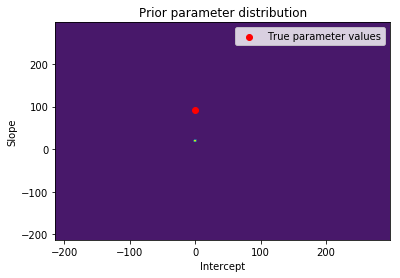

In [5]:
import numpy as np
from scipy.stats import multivariate_normal
from scipy.stats import norm as univariate_normal
import matplotlib.pyplot as plt
from utils import plot_param_posterior

class Bayesian:
    def __init__(self, μ_w: np.ndarray, Σ: np.ndarray, σ_2: float):
        self.μ_w = μ_w[:, np.newaxis]
        self.Σ = Σ

        self.P_ϴ = multivariate_normal(prior_mean, prior_cov_matrix)

        self.σ_2 = σ_2
        self.inv_σ_2 = 1 / σ_2

        self.P_ϴ_x_y = self.P_ϴ

        self.ϴ_bar = self.μ_w
        self.A = self.Σ

    def update_posterior(self, X, y):
        y = y[:, np.newaxis]
        XTX = X.T.dot(X)
        inv_Σ = np.linalg.inv(self.Σ)
        self.A = self.σ_2*np.linalg.inv(inv_Σ + XTX)
        self.ϴ_bar = (self.inv_σ_2*self.A).dot(inv_Σ.dot(self.μ_w) + X.T.dot(y))

        self.P_ϴ_x_y = multivariate_normal(self.ϴ_bar.flatten(), self.A)


    def predict(self, X: np.ndarray):
        ϴ_star = X.dot(self.ϴ_bar)
        A_star = X.dot(self.A.dot(X.T)) + self.σ_2
        P_y_star_ϴ_x = univariate_normal(loc=ϴ_star.flatten(), scale=A_star ** 0.5)
        return P_y_star_ϴ_x

prior_mean = np.array([0, 20])
prior_cov_matrix = λ_m
likelihood_dev = 0.25
likelihood_var = likelihood_dev**2
regressors = Bayesian(μ_w=prior_mean, Σ=prior_cov_matrix, σ_2=likelihood_var)
pos, posterior = plot_param_posterior(lower_bound=y.min(), upper_bound=y.max(), blr=regressors,w0=direct_weights[0], 
                     w1=direct_weights[1], 
                     title="Prior parameter distribution" )

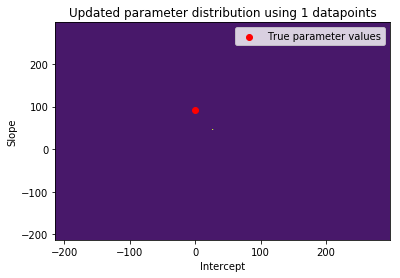

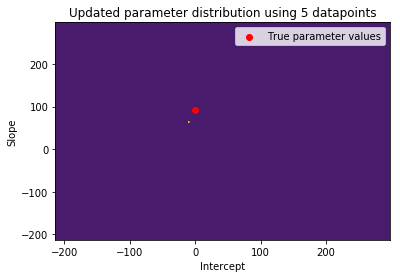

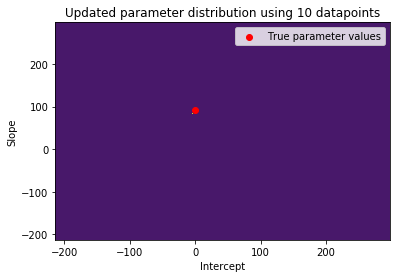

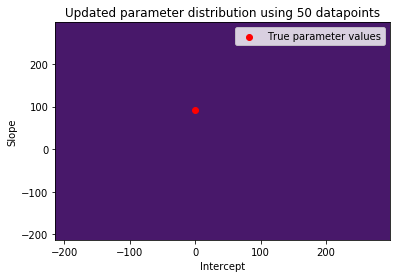

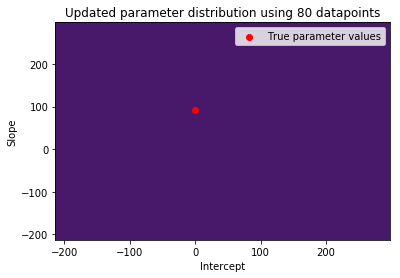

In [6]:
n_points_lst = [1, 5, 10, 50, 80]
previous_n_points = 0
for n_points in n_points_lst:
    train_features = X_train[previous_n_points:n_points]
    train_labels = y_train[previous_n_points:n_points]
    regressors.update_posterior(train_features, train_labels)
    
    # Visualize updated parameter posterior distribution
    pos, posterior = plot_param_posterior(lower_bound=y.min(), 
                         upper_bound=y.max(), 
                         blr=regressors, 
                         w0=direct_weights[0], w1=direct_weights[1],
                         title=f"Updated parameter distribution using {n_points} datapoints")
    
    previous_n_points = n_points

Maximum a posteri weights: [ 1.04994999 87.34994999]


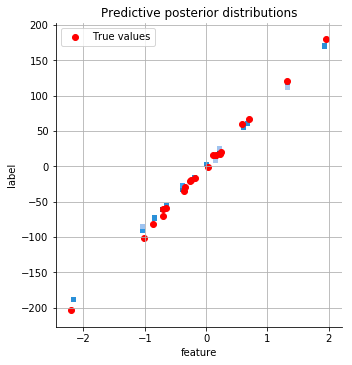

In [7]:
argmax_index = np.unravel_index(posterior.argmax(), posterior.shape)
print('Maximum a posteri weights:',pos[argmax_index[0],argmax_index[1],:])
import pandas as pd
import seaborn as sns

all_rows = []
for input in X_test:
    pred_posterior = regressors.predict(input)
    sample_predicted_labels = pred_posterior.rvs(size=1000)
    for label in sample_predicted_labels:
        all_rows.append([input[1], label])

all_data = pd.DataFrame(all_rows, columns=["feature", "label"])
sns.displot(data=all_data, x="feature", y="label")
plt.scatter(x=X_test[:,1], y=y_test, color="red", label="True values")
plt.title("Predictive posterior distributions")
plt.legend()
plt.plot();

## Kernels

We can expand the idea of linear regression to fit non-linear functions by use of kernels. Here the idea is to use some 
mapping function $\phi(x)$ that maps a non-linear function of the input features in the original space $x$ to a new 
space where they can be represented as linear combination of the input features (also called the **feature space**). 
Kernels also provide another benefit in
 that they computational complexity is dependent on the size of the data and not the number of features. We shall see why, shortly.
A kernel function is defined as any function that can be represented in the following format:
 
 $k = \phi(x)^{T}\phi(x')$ 

where

* $x$ and $x'$ are two different data points 

* k is positive semi-definite and symmetric. There are several methods to verify this characteristic 

1. $A_{N×N}$ is PSD if and only if all of its eigenvalues are non-negative.
2. $A_{N×N}$ is PSD if and only if the determinants of all of its leading
principal minors are non-negative. [Leading Principle Minor](https://www.dr-eriksen.no/teaching/GRA6035/2010/lecture5.pdf)
3. $A_{N×N}$ is PSD if and only if there is a PSD matrix $B$ such that $BB^T = A$
(this matrix $B$ is unique and called the square root of $A$).
4. $A_{N×N}$ is PSD if and only if, $∀c ∈ R_{N}, c^TAc ≥ 0$

### Rules for Kernels

<div style="text-align: left;"><img src="images/ChOneFigOne.png" alt="KernelRules" width="400"/></div>

Let us begin by deriving a version of linear regression loss function that can make use of this strategy. We do this 
for each of the approaches defined above for evaluating the optimum value of $\theta\

### Maximum Likelihood

We know from earlier:

$E(\theta) = \sum_{0}^{m}(y_i-\theta^T \phi(x_i))^2$

$\theta = \frac{\sum_{0}^{m}x_{i}y_{i}}{\sum_{0}^{m} x_{i}^2} = (\phi(X)^{T} \phi(X)^{-1}Y^{T})\phi(X)$

Hence $\theta$ can be written as a linear combination of the input dataset $\phi(x)$. Therefore we can redefine $\theta$ based 
on a new variable $a$, where $\theta = \phi(x)a$ 

which leads to:

$E(a) = \min_{\theta}(\sum_{0}^{m}(y_i-(\phi(x)a)^{T}\phi(x_{i}))^2)$

$E(a) = \min_{\theta}(\sum_{0}^{m}(y_i-a^{T}\phi(x)^{T}\phi(x_i))^2)$

$E(a) = \min_{\theta}(\sum_{0}^{m}(y_i-a^{T}k(x_{i},x))^2)$

$\frac{dE}{da} = \sum_{0}^{m}k(x_{i},x)(y_{i}-a^{T}k(x_{i},x)) = 0$

$  K^T(Y-Ka) = 0$

$  K^TY-K^TKa = 0$

$  K^TY = K^TKa$

$  Y = Ka $


$\therefore a = K^{-1}Y$

Where $K$ is the kernel that defines the capacity (hypothesis space) of the model. Lets looks an example below for a 
quadratic kernel:

$(\phi(x_i)^{T}\phi(x_{j}))^2$

for a sample set of two records:

$\begin{bmatrix}x_{11} \\ x_{12}\end{bmatrix},\begin{bmatrix} x_{21} \\ x_{22}\end{bmatrix}$

then 

$(\phi(x_i)^{T}\phi(x))^2 = (x_{11}x_{21} + x_{12}x_{22})^2   =  (x_{11}^2x_{21}^2 + 2x_{11}x_{21}x_{12}x_{22} + 
x_{12}^2x_{22}^2) = $

$\begin{bmatrix}x_{11}^2 & \sqrt{2}x_{11}x_{12} & x_{12}^2\end{bmatrix}\begin{bmatrix} x_{21}^2 \\ \sqrt{2}x_{21}x_{22} \\ x_{22}^2\end{bmatrix}$

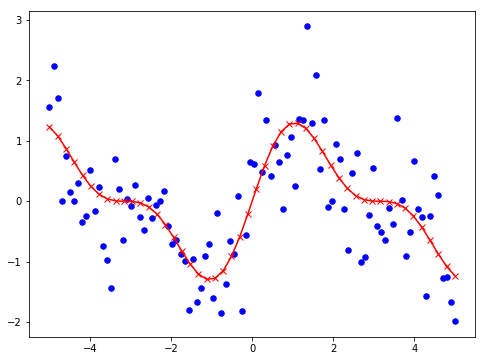

In [8]:
from  scipy.linalg import pinv
import scipy

def polynomial_kernel(X_1,X_2,m):
    return np.dot(X_1,X_2.T)**m

def exponentiated_quadratic_kernel(xa, xb,sigma):
    """Exponentiated quadratic  with σ=1"""
    # L2 distance (Squared Euclidian)
    sq_norm = - scipy.spatial.distance.cdist(xa, xb, 'sqeuclidean') / (2 * (sigma ** 2))
    return np.exp(sq_norm)

m = 1
X = np.linspace(-5,5,100)[:,np.newaxis]
y = np.sin(X)*(1+np.cos(X))
noise = univariate_normal.rvs(loc=0,scale=0.7,size=X.shape[0],random_state=random.randint(1,1000))[:,np.newaxis]
y_noise =  y + noise
fig = plt.figure(figsize=(8, 6))
plt.scatter(X, y_noise, color="b", marker="o", s=30)
X_star = np.linspace(-5,5,50)[:,np.newaxis]
K = exponentiated_quadratic_kernel(X,X,m)
a = np.dot(pinv(K),y)
k_star = exponentiated_quadratic_kernel(X_star,X,m)
y_star = np.dot(k_star,a)
y_star_o = np.sin(X_star)*(1+np.cos(X_star))
plt.plot(X_star, y_star, color="r", marker="x")
plt.show()

### Maximum A Posteri

Similarly for Maximum A Posteri

$E(\theta) = Y^{T}Y - 2Y^{T}\phi(X)\phi(X)^{T}a  + a^{T}\phi(X) \phi(X)^{T}\phi(X)\phi(X)^{T}a + a^{T}\phi(X) 
\Sigma^{-1} 
\phi(X)^{T}a - 2\mu_{w}^{T} \Sigma^{-1} \phi(X)^{T}a + \mu_{w}^{T} \Sigma^{-1} \mu_{w}$

$E(a) = Y^{T}Y - 2Y^{T}Ka  + a^{T}KKa + a^{T}\phi(X) \Sigma^{-1} \phi(X)^{T}a - 2\mu_{w}^{T} \Sigma^{-1} \phi(X)^{T}a + \mu_{w}^{T} \Sigma^{-1} \mu_{w}$

We need to make a few assumptions here without which we cannot use the kernel trick:

* The covariance matrix $\Sigma^{-1} = \lambda I$. This is because without this assumption the fourth term cannot be 
cannot be simplified to make use of the kernel as the covariance matrix cannot be factored out

* The mean of the prior is 0 ($\mu_w$ = 0). This is because without this assumption we cannot replace the fifth term 
with a kernel.  


$\frac{dE}{da} =  K^{T}(Ka-Y) +2\lambda I Ka = 0$

$K^{T}Y =  K^{T}Ka + 2\lambda I Ka$

absorbing the constant into $\lambda$ we get

$K^{T}Y =  K^{T}Ka + K^{T}\lambda I a$

$Y =  a(K + \lambda I) $

$a = (K+\lambda I)^{-1}Y$

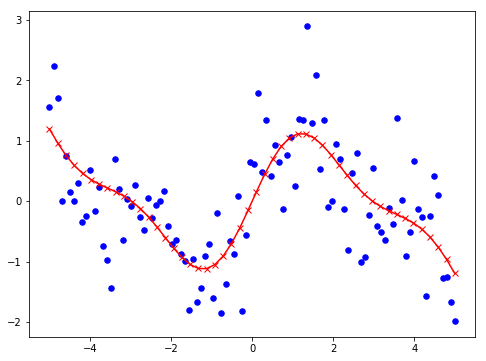

In [9]:

m = 2
fig = plt.figure(figsize=(8, 6))
plt.scatter(X, y_noise, color="b", marker="o", s=30)

K = exponentiated_quadratic_kernel(X,X,m)
I = np.eye(K.shape[0])


λ =0.025
a = np.dot(np.linalg.pinv(K+λ*I),y)
k_star = exponentiated_quadratic_kernel(X_star,X,m)
y_star = np.dot(k_star,a)

plt.plot(X_star, y_star, color="r", marker="x")
plt.show()


## Gaussian Process Regression

Another way of identifying an underlying function is by defining a posterior distribution over an entire function 
rather than the weights. We do this by thinking of the function being derived from a multivariate gaussian 
distribution with each data point representing a random variable. 

$P(f(X)) = P(f(x_{1}),\cdots, f(x_{n})) = \mathcal{N}(f(X)|\mu(X),\Sigma(X)) = \frac{1}{((2\pi)^{D/2}|\Sigma|^{1/2})}e^{-
(\frac{1}{2}
(x-\mu)
^{T}\Sigma^{-1}
(x-\mu))} $

we know = $f(X) = \phi(X)\theta$. If we assume that the prior distribution of $\theta = \mathcal{N}(\theta|0,\lambda 
I)$ then:

$\mu(X) = E(f(X)) = E(\phi(X)\theta) = \phi(X) E(\theta) = 0$
$\Sigma(X) = E((f(X)-\mu(X))((f(X)-\mu(X)) = E(f(X)f(X)) = \phi(X)^{T}\phi(X) E(\theta^{T}\theta) = \frac{\phi(X)^{T}\phi(X)}{\alpha}$
$\therefore \Sigma(X) = k(X,X)$


We now split this multivariate Gaussian distribution $P(f(X))$ into two sets  of random variables that are jointly 
gaussian and identify resulting conditional distribution of one set of variables onto the other. We
partition vector into: 
 
$P(f(X_{all})) = P(f(X),f(X^{*})) = \mathcal{N}(\begin{bmatrix}f(X)\\f(X^{*})\\\end{bmatrix}|\begin{bmatrix}\mu_{f(X)}\\\mu_{f(X^{*})}\\\end{bmatrix},\begin{bmatrix}k(X,X) & k(X,X^{*})\\k(X^{*},X) & k(X^{*},X^{*})\\\end{bmatrix})$

We can do this because the predicted function outputs $f(X*)$ are derived from the same distribution as $f(X)$

By Product Rule we can then define the conditional probability of $P(f(X^{*})|f(X))$ as

$ P(f(X^{*})|f(X)) = \frac{P(f(X^{*}),f(X))}{P(f(X))} = \mathcal{N}(f(X^{*})|\mu_{f(X^{*})|f(X)},\Sigma_{f(X*)|f(X)}) = \frac{1}{\sqrt{(2\pi)^{n_1}\Sigma_{f(X^{*})|f(X)}}}e^{-\frac{1}{2}(f(X^{*})-\mu_{f(X^{*})|f(X)})^{T}\Sigma_{f(X^{*})|f(X)}(f(X^{*})-\mu_{f(X^{*})|f(X)})} $

where 
* $\mu_{f(X^{*})|f(X)} = \mu_{f(X^{*})} + k(X^{*},X)k(X,X)^{-1}(X - \mu_{f(X)}) $
* $\Sigma_{f(X^{*})|f(X)} = k(X^{*},X^{*}) - k(X^{*},X)k(X,X)^{-1}k(X,X^{*})$

If we preturb f(X) with some noise such that:

$f(X) = \phi(X)\theta +\epsilon$ where $\epsilon = \mathcal{N}(\epsilon|0,\sigma^{2} I)$ 

$f(X^{*}) = \phi(X^{*})\theta +\epsilon$ where $\epsilon = \mathcal{N}(\epsilon|0,\sigma^{2} I)$ 

By rules of marginal probability:

$P(f(X)) = \mathcal{N}(f(X)|0,k(X,X)) + \mathcal{N}(\epsilon|0,\sigma^{2} I)$

Therefore:

$P(f(X)) = \mathcal{N}(f(X)|0,k(X,X) + \sigma^{2} I)$

$P(f(X^{*})) = \mathcal{N}(f(X^{*})|0,k(X,X) + \sigma^{2} I)$

As a result:

where 
* $\mu_{f(X^{*})|f(X)} = \mu_{f(X^{*})} + k(X^{*},X)(k(X,X)+ \sigma^{2} I)^{-1}(X - \mu_{f(X)}) $
* $\Sigma_{f(X^{*})|f(X)} = k(X^{*},X^{*}) + \sigma^{2} I - k(X^{*},X)(k(X,X)+ \sigma^{2} I)^{-1}k(X,X^{*})$




In [10]:
def GP(X1, y1, X2, kernel_func, kernel_width,  σ_noise):
    """
    Calculate the posterior mean and covariance matrix for y2
    based on the corresponding input X2, the observations (y1, X1),
    and the prior kernel function.
    """
    # Kernel of the observations
    Σ11 = kernel_func(X1, X1, kernel_width) + ((σ_noise ** 2) * np.eye(X1.shape[0]))
    # Kernel of observations vs to-predict
    Σ12 = kernel_func(X1, X2, kernel_width)
    # Solve

    solved = scipy.linalg.solve(Σ11, Σ12, assume_a='pos').T
    # Compute posterior mean
    μ2 = solved @ y1
    # Compute the posterior covariance
    Σ22 = kernel_func(X2, X2, kernel_width)
    Σ2 = Σ22 - (solved @ Σ12)
    return μ2, Σ2  #




In [11]:
# Compute the posterior mean and covariance

f_cos = lambda x: (np.cos(x)).flatten()

n1 = 25  # Number of points to condition on (training points)
n2 = 75  # Number of points in posterior (test points)
ny = 5  # Number of functions that will be sampled from the posterior
domain = (-6, 6)

# Sample observations (X1, y1) on the function
X1 = X
y1 = y.squeeze()
# Predict points at uniform spacing to capture function
X2 = X_star
# Compute posterior mean and covariance
μ2, Σ2 = GP(X1, y1, X2, exponentiated_quadratic_kernel, 1.4, 0.5)
#μ2, Σ2 = GP(X1, y1, X2, polynomial_kernel, 4, 0.5)
# Compute the standard deviation at the test points to be plotted
σ2 = np.sqrt(np.diag(Σ2))

# Draw some samples of the posterior
y2 = np.random.multivariate_normal(mean=μ2, cov=Σ2, size=ny)

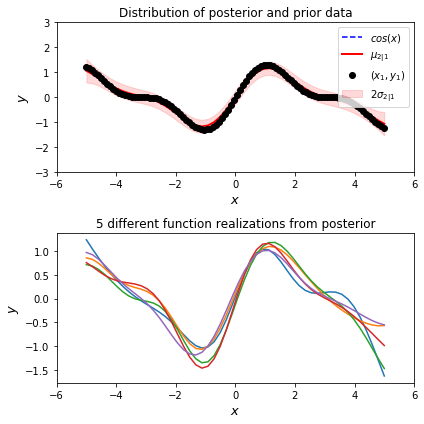

In [12]:
fig, (ax1, ax2) = plt.subplots(
    nrows=2, ncols=1, figsize=(6, 6))
# Plot the distribution of the function (mean, covariance)
ax1.plot(X2, y_star_o, 'b--', label='$cos(x)$')
ax1.fill_between(X2.flat, μ2-2*σ2, μ2+2*σ2, color='red', 
                 alpha=0.15, label='$2\sigma_{2|1}$')
ax1.plot(X2, μ2, 'r-', lw=2, label='$\mu_{2|1}$')
ax1.plot(X1, y1, 'ko', linewidth=2, label='$(x_1, y_1)$')
ax1.set_xlabel('$x$', fontsize=13)
ax1.set_ylabel('$y$', fontsize=13)
ax1.set_title('Distribution of posterior and prior data')
ax1.axis([domain[0], domain[1], -3, 3])
ax1.legend()
# Plot some samples from this function
ax2.plot(X2, y2.T, '-')
ax2.set_xlabel('$x$', fontsize=13)
ax2.set_ylabel('$y$', fontsize=13)
ax2.set_title('5 different function realizations from posterior')
ax1.axis([domain[0], domain[1], -3, 3])
ax2.set_xlim([-6, 6])
plt.tight_layout()
plt.show()
#

## Gaussian Mixture Model

A mixture model is a density model where we combine a finite number of K distributions (lets say gaussian
$\mathcal{N}(x|\mu_{k},\Sigma_{k})$ with each distribution having a distinct prior probability $\pi_k$). We can 
define the likelihood of a sample dataset given the set of parameters as:

$P(x|\theta) = \sum_{0}^{k}\pi_k\mathcal{N}(x|\mu_{k},\Sigma_{k})$

where  $\sum_{0}^{k}\pi_k = 1$

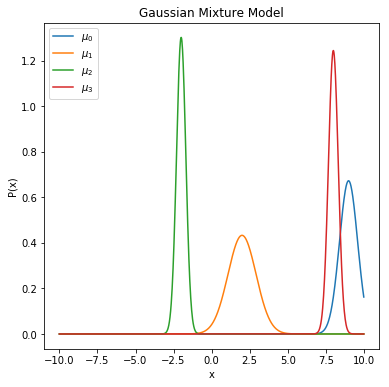

In [13]:
mean = np.random.randint(-10,10,4,int)
covariance = np.random.rand(4)
X = np.linspace(-10,10,1000)
fig = plt.figure(1,(6,6))
for i in range(0,len(mean)):
    norms = univariate_normal(loc=mean[i], scale=covariance[i])
    plt.plot(X,norms.pdf(X), label="$\mu_{0}$".format(i))
plt.xlabel('x')
plt.ylabel('P(x)')
plt.title('Gaussian Mixture Model')
plt.legend()
plt.show()

If the underlying parameters of the distribution is unknown and the training dataset has no defined classes defined, 
we can treat this as a clustering exercise. However to do this we must learn the parameter values first by means of 
one of the parameter estimation techniques . Like in linear regression we can perform this by:

* **Maximum Likelihood Estimation**
* Maximum A Posteri
* Bayesian Learning

For simplicity sake we will only consider the Maximum Likelihood approach here as it is sufficiently accurate:

$\theta_{MLE} = \max_{\theta}\mathcal{L}(\theta) = max_{\theta}(\prod_{n=1}^{m}P(x|\theta)) = \prod_{n=1}^{m}\sum_{j=1}^{K}\pi_{j}\mathcal{N}(x|\mu_{j},\Sigma_{j})$

$\theta_{MLE} = \max_{\theta}\mathcal{\log(L}(\theta)) = \max_{\theta}(\log(\prod_{n=1}^{m}P(x|\theta))) = 
\log(\prod_{n=1}^{m}\sum_{j=1}^{K}\pi_{j}\mathcal{N}(x|\mu_{j},\Sigma_{j}))$

$\theta_{MLE} =  \max_{\theta}(\sum_{n=1}^{m}\log(P(x|\theta))) = 
\sum_{n=1}^{m}\log(\sum_{j=1}^{K}\pi_{j}\mathcal{N}(x|\mu_{j},\Sigma_{j}))$

Hence we can maximize the log likelihood by:

$\frac{\partial \log (\mathcal{L}(\theta))}{\partial \theta} = \sum_{n=1}^{m}\frac{1}{P(x|\theta)} \frac{\partial P(x|\theta)}{\partial \theta}$

Finding the deravative with respect to each parameter we get:

$\frac{\partial P(x|\theta)}{\partial \mu_{k}} = \sum_{n=1}^{m}\frac{1}{P(x|\theta)} \frac{\partial P(x|\theta)
}{\partial \mu_{k}}=\sum_{n=1}^{m}(x-\mu_{k})^{T}\Sigma_{k}^{-1} \frac{\pi_{k}\mathcal{N}(x|\mu_{k},
\Sigma_{k})}{\sum_{j=1}^{K}\pi_{j}\mathcal{N}(x|\mu_{j},\Sigma_{j})} = \sum_{n=1}^{m}r_{nk}(x-\mu_{k})^{T}\Sigma_{k}^{-1}=0$

$\mu_{k} = \ \frac{\sum_{n=1}^{m}r_{nk}x}{N_{k}} $

Where $r_{nk} = \frac{\pi_{k}\mathcal{N}(x|\mu_{k},\Sigma_{k})}{\sum_{j=1}^{K}\pi_{j}\mathcal{N}(x|\mu_{j},\Sigma_{j})}$ and $N_{k}=\sum_{n=1}^{m}r_{nk}$



$\frac{\partial P(x|\theta)}{\partial \Sigma_{k}} = \sum_{n=1}^{m}\frac{1}{P(x|\theta)} \frac{\partial P(x|\theta)
}{\partial \Sigma_{k}}= \sum_{n=1}^{m}[\frac{1}{2}(\Sigma_{k}^{-1 }-\Sigma_{k}^{-1}(x-\mu_{k})(x-\mu_{k}^{T})\Sigma_{k}^{-1})] \frac{\pi_{k}\mathcal{N}(x|\mu_{k},\Sigma_{k})}{\sum_{j=1}^{K}\pi_{j}\mathcal{N}(x|\mu_{j},\Sigma_{j})} = 0$

$\Sigma_{k} = \ \frac{\sum_{n=1}^{m}r_{nk}(x-\mu_{k})(x-\mu_{k}^{T})}{N_{k}} $

When evaluating partial deravative with respect to $\pi_{k}$ we need to ensure that the constrain $\sum_{j=1}^{K}\pi_k$ is met. We do this by using langrange multipliers and defining the Langrangian as:

$\mathfrak{L} = \log(\mathcal{L}(\theta))+\lambda(\sum_{j=1}^{K}\pi_k - 1)$

$\frac{\partial \mathfrak{L}}{\partial \pi_{k}} = \sum_{n=1}^{m}\frac{\mathcal{N}(x|\mu_{k},\Sigma_{k})}{\sum_{j=1}^{K}\pi_{j}\mathcal{N}(x|\mu_{j},\Sigma_{j})} + \lambda = \frac{1}{\pi_{k}}\sum_{n=1}^{m}\frac{\pi_{k}\mathcal{N}(x|\mu_{k},\Sigma_{k})}{\sum_{j=1}^{K}\pi_{j}\mathcal{N}(x|\mu_{j},\Sigma_{j})} + \lambda = \frac{1}{\pi_{k}}N_{k} + \lambda$

Taking deravative with respect to the multiplier $\lambda$

$\frac{\partial \mathfrak{L}}{\partial \lambda} = (\sum_{j=1}^{K}\pi_k - 1)$

$\pi_{k} = \frac{N_{k}}{\lambda}$

$\sum_{j=1}^{K}\pi_k  = 1$

$\sum_{j=1}^{K}\frac{N_{k}}{\lambda}  = 1$

$\lambda = -N$

$\pi_{k} = \frac{N_{k}}{N}$


### Expectation Maximization Algorithm

We notice from the above derivation that the evaluation of each of the parameters is not of closed form, therefore we need to make use of an iterative scheme to identify the optimum solution for the parameters. Hence we:

1.) Choose an initial random value for $\mu_{k}, \Sigma_{k}, \pi_{k}$

2.) Evaluate the responsibilities $r_{nk}$ (posterior probability of datapoint $m$ belonging to mixture component k).

3.) Use the updated responsibilities to reestimate the parameters $\mu_{k}, \Sigma_{k}, \pi_{k}$

In [14]:
from utils import (plot_axis_pairs, plot_contour_pairs, plot_axis)

class GMM:
    def __init__(self, k, max_iter=5):
        self.k = k
        self.max_iter = int(max_iter)

    def initialize(self, X):
        self.shape = X.shape
        self.n, self.m = self.shape

        # pi_k is the distribution of probability for each class (11.42)
        self.pi = np.full(shape=self.k, fill_value=1 / self.k)

        # r_nk is the responsibility is soft assignment probability that a data point belongs to specific mixture
        # class  (11.17)
        self.r = np.full(shape=(self.n, self.k), fill_value=1 / self.k)

        random_samples = np.random.randint(low=0, high=self.n, size=self.k)

        # mu_k is the mean for the multivariate normal distribution representing each class (11.20). For its value we
        # assume it lies at any one given x point
        self.mu = [X[row_index, :] for row_index in random_samples]

        X_split = np.split(X, self.k, axis=0)

        # sigma_k is the covariance matrix for the multivariate normal distribution representing each class (11.20).
        # For its value we evaluate the variance of three random splits of the datapoints
        self.sigma = [np.cov(i.T) for i in X_split]

    def e_step(self, X):
        # the equation for evaluating r is the posterior probability of each classification for each data point. It is represented by a mulivariate normal distribution
        distribution = np.array([multivariate_normal(mean=self.mu[i], cov=self.sigma[i]).pdf(X) for i in range(self.k)])
        k = np.multiply(distribution.T, self.pi)
        self.r = k / k.sum(axis=1)[:, np.newaxis]
        return self.r


    def m_step(self, X):
        self.pi = np.mean(self.r, axis=0)
        for i in range(self.k):
            r = self.r[:, [i]]
            N_k = r.sum()
            self.mu[i] = (X * r).sum(axis=0) / N_k
            self.sigma[i] = np.cov(X.T, aweights=(r / N_k).flatten(), bias=True)

    def fit(self, X):
        self.initialize(X)

        for iteration in range(self.max_iter):
            self.e_step(X)
            self.m_step(X)

    def predict(self, X):
        r = self.e_step(X)
        return np.argmax(r, axis=1)


<class 'numpy.ndarray'>


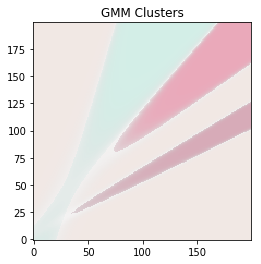

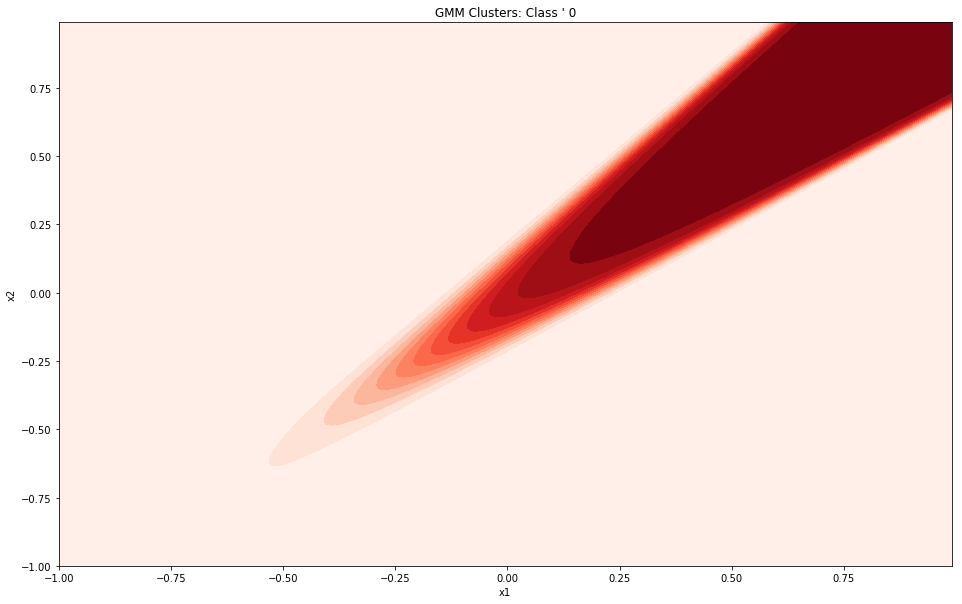

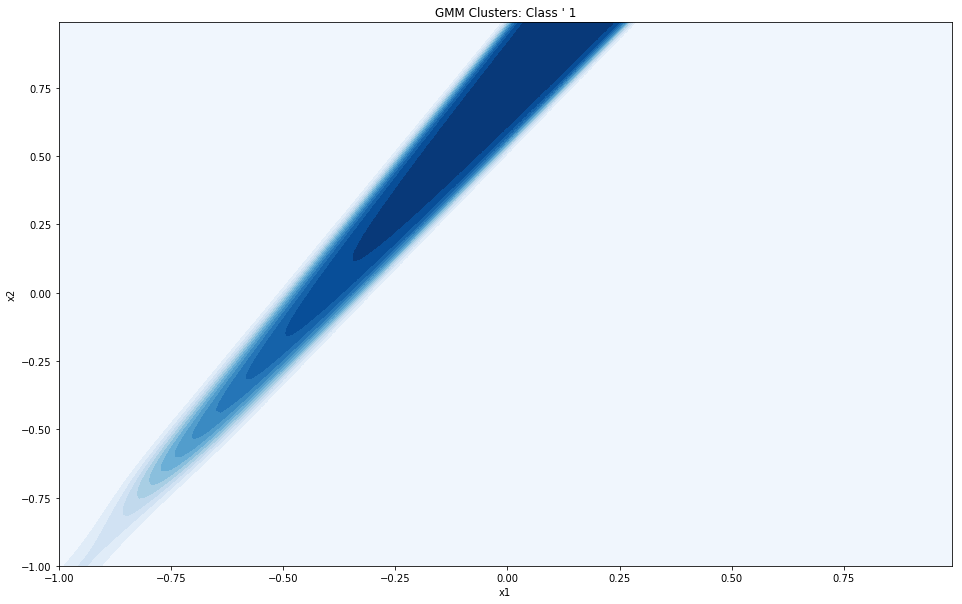

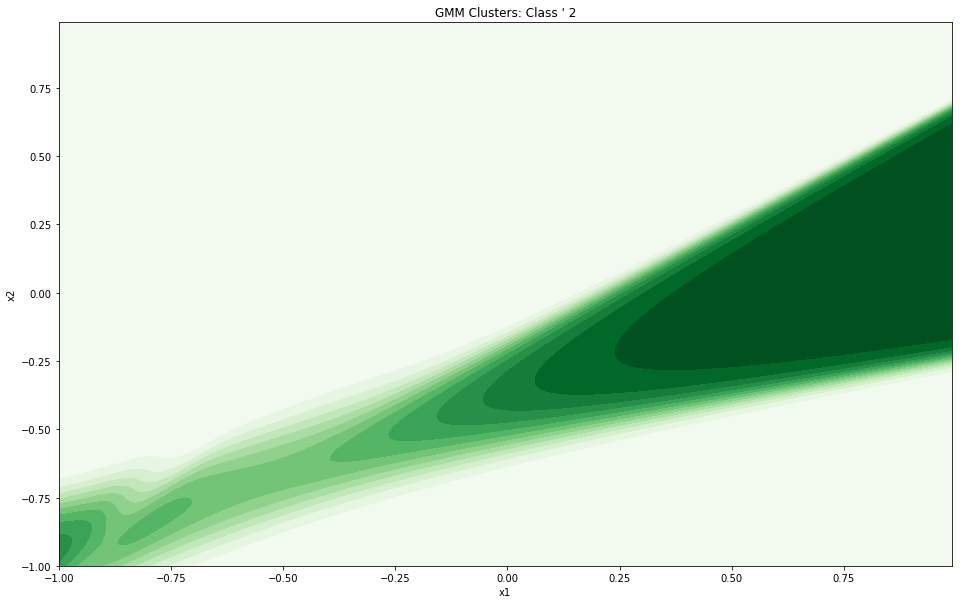

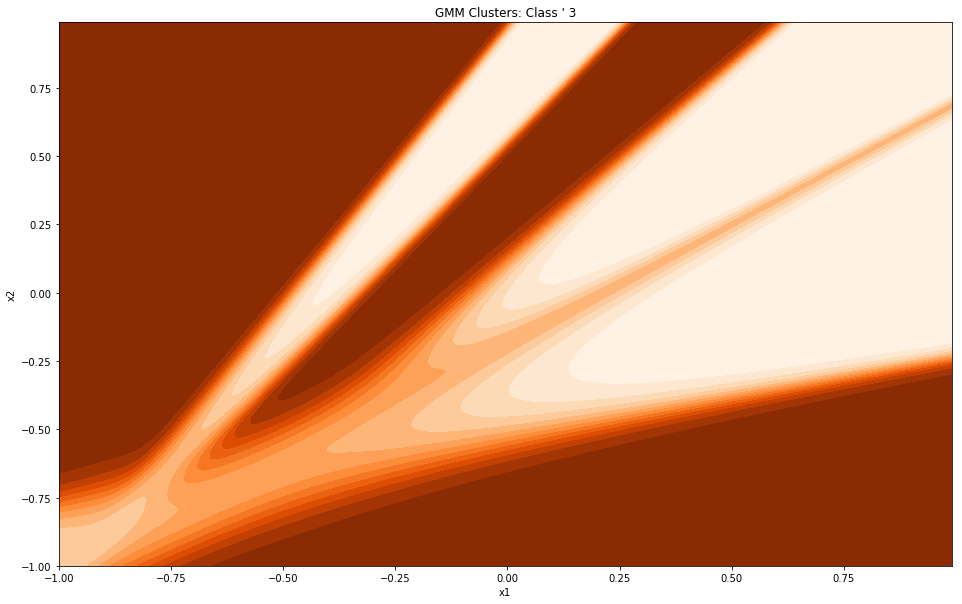

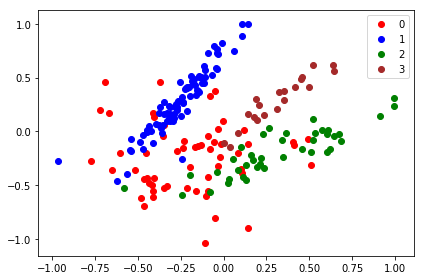

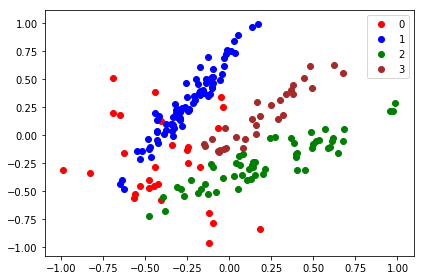

In [15]:
from sklearn.preprocessing import MinMaxScaler
import random as random
from scipy.stats import mode
X, y = datasets.make_classification(class_sep=0.8, weights=(0.3,0.4,0.2,0.1), random_state=random.randint(1,10), 
                            n_samples=200, n_features=2, n_redundant=0,n_clusters_per_class=1, n_informative=2, n_classes=4)
scaler = MinMaxScaler((-1,1))
X = scaler.fit_transform(X)

classes = 4
lower_bound = -1
upper_bound = 1

gmm = GMM(k=classes, max_iter=100)

gmm.fit(X)
permutation = np.array([
    mode(y[gmm.predict(X) == i]).mode.item()
    for i in range(gmm.k)])

permuted_prediction = permutation[gmm.predict(X)]

grid = np.mgrid[lower_bound:upper_bound:.01, lower_bound:upper_bound:.01]
X_grid = np.dstack((grid[0],grid[1])).reshape(-1,2)
full_grid = np.append(X_grid, gmm.e_step(X_grid),axis=1).reshape(grid.shape[1],grid.shape[1],grid.shape[0]+classes)
X_contour, y_contour = full_grid[:,:,0:2],  full_grid[:,:,2:grid.shape[0]+classes]

plot_contour_pairs(X_contour, y_contour, ['Reds','Blues','Greens','Oranges'])

plot_axis(X=X,y=y, cdict = {0: 'red', 1: 'blue', 2: 'green', 3: 'brown'})
plot_axis(X=X,y=permuted_prediction, cdict = {0: 'red', 1: 'blue', 2: 'green', 3: 'brown'})



# Hidden Markov Models

## Latent Approach to Gaussian Mixture Models 

Another approach to model a mixture of Gaussians is from the perspectives of latent variables. A *latent variable* is
 an unobserved variable that is different from the model parameters as they do not explicitly parameterize the model.
  Latent variables help to simplify data generating processes that are complex to model using just the parameters of 
  a distributions. In the case of Gaussian Mixture Models we can define a latent variable $z$ that controls which 
  mixture component has generated a specific data point. The probability distribution of this component is defined as:
  
  $P(x|z_{k}=1) = \mathcal{N}(x|\mu_{k},\Sigma_{k})$ where we assume that the parameters $\mu_{k},\Sigma_{k}$ are known
  
  The random variable $z$ is a vector of size K where only a single entry in the vector has a value of 1 (indicating
   the $k^{th}$ mixture generating the data point) and remaining 
  being 0.
  
  The $P(z)$ is defined as a multinouli distribution:
  
  $P(z) = \pi = \begin{bmatrix} \pi_{1} & \pi_{2} & \cdots & \pi_{K}\end{bmatrix}$ where $\sum_{k=1}^{K} \pi_{k} = 1$

Hence we define the graphical model for the mixture of gaussians as:

<div style="text-align: left;"><img src="images/GMMGraphical.png" alt="GMM Graphical Model" width="100"/></div>

where latent variable $z$ is parameterized by $\pi$ and variable $x$ is parameterized by $\mu_{k}, \Sigma_{k}$

Applying Bayes Theorem here and by the d-separation rule of graphical models we can say that:

$p(x_{1},x_{2},x_{3},\cdots, x_{n}|z_{1},z_{2},z_{3},\cdots, z_{n}) =\prod_{n=1}^{N}{P(x_{n}|z_{n})}$



$P(z_{nk}=1|x_{n}) = r_{nk} = \frac{\pi_{k}\mathcal{N}(x|\mu_{k},\Sigma_{k})}{\sum_{j=1}^{K}\pi_{j}\mathcal{N}(x|\mu_{j},\Sigma_{j})}$

\


## Markov Chains

A Markov Chain is a random walk in a state space made of a finite set of possibilities for a random variable 
$z = \begin{bmatrix} z_{1} & z_{2} & \cdots & z_{K}\end{bmatrix}$. The Markov Chain is the sequence of random 
variables tracking the state of the model in time step $z^{1},z^{2},z^{3},\cdots, z^{t} $. 
A Markov Chain must satisfy the Markov Property that states that given the present state, the past state and the 
future states are conditionally independent:

$P(z^{t+1}|z^{t}, z^{t-1}, \cdots, z^{3},z^{2},z^{1})= P(z^{t+1}|z^{t})$

### Transition Matrix

Hence we can define the probability of each state transition to a different state in the form of a $KXK$ **Transition Matrix**:

$a = 
     \begin{bmatrix}
     P(z_1^{t+1}|z_1^{t}) & \cdots & P(z_K^{t+1}|z_1^{t})\\ 
     \vdots & \vdots & \vdots  \\
     P(z_1^{t+1}|z_K^{t}) & \cdots & P(z_K^{t+1}|z_K^{t})
     \end{bmatrix} = 
     \begin{bmatrix}
     a_{11} & \cdots & a_{1K}\\ 
     \vdots & \vdots & \vdots  \\
     a_{K1} & \cdots & a_{KK}
     \end{bmatrix} 
     $
     
Where $\pmb a * \pmb 1 = \pmb 1$ i.e. Sum of all transitions out of a state is equal to 1

### Initial Probability Distribution

Similar to Gaussian Mixture Models, we can define a initial probability distribution (multinouli) as prior for the possible state of the system at time step 0:

$\pi^{0} = \begin{bmatrix} P(z^{0}_{1}) & \cdots & P(z^{0}_{K})\end{bmatrix} = \begin{bmatrix} \pi^{0}_{1} & \cdots & \pi^{0}_{K}\end{bmatrix}$ where $\sum_{k=1}^{K} \pi^{0}_{k} = 1$

## Hidden Markov Model

Given the latent approach to Gaussian Mixture Models and a Markov Chain we can define a Hidden Markov Model as 
the following 

<div style="text-align: left;"><img src="images/HMM.png" alt="Hidden Markov Model" width="400"/></div>

Here each time step of the markov chain is represented as a mixture of gaussian where the latent variables $z^{t}$ are hidden
 and their conditional dependencies obey the markov property. At each timestep the latent variable emits an observable variable
 giving us a corresponding $x^{1},x^{2},x^{3},\cdots, x^{T} $ for each $z^{1},z^{2},z^{3},\cdots, z^{T} $. This can be defined by the emission matrix as presented by the matrix below. 
 
### Emission Matrix

$b = \begin{bmatrix}
     P(x^{t}|z_1^{t}) \\ 
     \vdots  \\
     P(x^{t}|z_K^{t})
     \end{bmatrix}     =
     \begin{bmatrix}
     \mathcal{N}(x|\mu_{1},\Sigma_{1}) \\ 
     \vdots  \\
     \mathcal{N}(x|\mu_{K},\Sigma_{K})
     \end{bmatrix}
     $

### Evaluation Problem

We begin by first solving the parameter learning problem, were try to evaluate the parameters $a,b,x,z$ given a 
latent variable values. This is given by $P(\theta|x^T)$. Using the Bayes Rule we can see:

$P(\theta|x^{1\cdots T}) = \frac{P(x^{1\cdots T}|\theta)P(\theta)}{\int_0^{\theta}P(x^{1\cdots T}|\theta)P(\theta)d \theta}$

if we learn the parameters using maximum likelihood estimation then 

$\theta = \max_\theta(P(x^{1\cdots T}|\theta))$

Therefore we need to evaluate the probability $P(x^T|\theta)$ first. This is equavilent to mariginal probability of the latent variable values in every possible sequence they can occur i.e. $ {}_{r}z = \begin{bmatrix} z_k^{1} & z_k^{2} & z_k^{3} & \cdots &  z_k^{t}      \end{bmatrix} $

$P(x^{1\cdots T}|\theta) = \sum_{0}^{r=R}P(x^{1\cdots T},{}_{r}z^{1\cdots T}|\theta) =  \sum_{0}^{r=R}P(x^{1 \cdots T}|\theta,{}_{r}z^{1\cdots T})P({}_{r}z^{1\cdots T})$

We know from the local Markov Property of directed Graph Models (HMM in this case) that the probability of every variable is independent of its ancestor given its parent. Hence we can say

$P(x^{1 \cdots T}|\theta,{}_{r}z^{1 \cdots T}) = \prod_0^{t=T} P(x^t|\theta,{}_{r}z^t)$

Similarly we can use the Markov property of Markov Chain to establish the probability of $P({}_{r}z^T) $

$P({}_{r}z^{1 \cdots T}) = P({}_{r}z^T|{}_{r}z^{T-1},{}_{r}z^{T-2},\cdots,{}_{r}z^{1})P({}_{r}z^{T-1},{}_{r}z^{T-2},\cdots,{}_{r}z^{1}) = P({}_{r}z^T|{}_{r}z^{T-1},{}_{r}z^{T-2},\cdots,{}_{r}z^{1})P({}_{r}z^{T-1}|{}_{r}z^{T-2},\cdots,{}_{r}z^{1})P({}_{r}z^{T-2},{}_{r}z^{T-3},\cdots,{}_{r}z^{1}) $

$= P({}_{r}z^1)\prod_{t=2}^{t=T}P({}_{r}z^t|{}_{r}z^{t-1})$

Putting these together we get:

$P(x^{1 \cdots T}|\theta) = \sum_{r=1}^{r=R}P({}_{r}z^1)\prod_{t=1}^{t=T} P(x^t|\theta,{}_{r}z^t)\prod_{t=2}^{t=T}P({}_{r}z^t|{}_{r}z^{t-1})$

If we assume that there are K different states and T steps then we know $R = K^T$. Each one of these state sequences 
have $2 T-1$ multiplications hence we have an overall of $(2T-1)K^T + (K^T-1)$ steps

Therefore a more efficient calculations method is required

### Forward Algorithm
The forward algorithm helps reduce the number of operations by using dynamic programming and allows us to compute the 
probability $P(z^{t},x^{1\cdots t})$ of the future timestep given the current timestep

$\alpha^{t}(z_j^{t}) = P(z_j^{t},x^{1\cdots t}) = \sum_{k=1}^{k=K} P(z_j^{t},z_k^{t-1},x^{1\cdots t}) $

$\sum_{k=1}^{k=K} P(x^{t}|z_j^{t},z_k^{t-1},x^{1\cdots t-1})P(z_j^{t},z_k^{t-1},x^{1\cdots t-1}) $

$\sum_{k=1}^{k=K} P(x^{t}|z_j^{t},z_k^{t-1},x^{1\cdots t-1})P(z_j^{t}|z_k^{t-1},x^{1\cdots t-1})P(z_k^{t-1},x^{1\cdots 
t-1}) $

$\sum_{k=1}^{k=K} P(x^{t}|z_j^{t})P(z_j^{t}|z_k^{t-1})P(z_k^{t-1},x^{1\cdots t-1}) $

$\alpha^{t}(z_j^{t}) = \sum_{k=1}^{k=K} P(x^{t}|z_j^{t})P(z_j^{t}|z_k^{t-1})\alpha^{t-1}(z_k^{t-1})$ Where $t = 1\to 
T$ and 
$\alpha^{1}(z_j^{1}) = P(z_j^{1},x^{1}) = P(x^{1}|z_j^{1})P(z_j^{1})$

We can use this to calculate $P(x^{1\cdots T}|\theta)$ by:

$P(x^{1 \cdots T}|\theta) = \sum_{j=1}^{j=K} P(z_j^{T},x^{1\cdots T}|\theta) = \sum_{j=1}^{j=K} P(z_j^{T},x^{1\cdots 
T}|\theta) = 
\sum_{j=1}^{j=K} \alpha^{T}(z_j^{T})$

The calculation for $\alpha$ can be represented as a DAG where each $\alpha$ is dependent on the previous layer 
$\alpha$ hence this can be solved via dynamic programming where:

Base Case for each k:

$\alpha^{1}(z_j^{1}) = P(x|z_j)P(z_j^{1}) = \pi_j P(x|z_j) = \pi_j \mathcal{N}(x|\mu_{j},\Sigma_{j})$

Inductive Case:

$\alpha^{t}(z_j^{t}) = \sum_{k=1}^{k=K} P(x^{t}|z_j^{t})P(z_j^{t}|z_k^{t-1})\alpha^{t-1}(z_k^{t-1})$

<div style="text-align: left;"><img src="images/ForwardAlgo.png" alt="Chain of Alphas" width="400"/></div>

This solves our parameter learning problem 

### Backward Algorithm

Similarly we can evaluate the $P(x^{t+1\cdots T}|z^{t})$

$\beta^{t}(z_j^{t}) = P(x^{t+1\cdots T}|z_{j}^{t}) = \sum_{k=1}^{k=K}P(x^{t+1 \cdots T},z_{k}^{t+1}|z_{j}^{t})$

$ = \sum_{k=1}^{k=K}P(x^{t+2\cdots T}|z_{k}^{t+1},x^{t+1},z_{j}^{t})P(z_{k}^{t+1},x^{t+1}|z_{j}^{t})$

$ = \sum_{k=1}^{k=K}P(x^{t+2 \cdots T}|z_{k}^{t+1},x^{t+1 },z_{j}^{t})P(x^{t+1}|z_{k}^{t+1},z_{j}^{t})P
(z_{k}^{t+1}|z_{j}^{t})$

$ = \sum_{k=1}^{k=K}P(x^{t+2 \cdots T}|z_{k}^{t+1})P(x^{t+1}|z_{k}^{t+1})P
(z_{k}^{t+1}|z_{j}^{t})$

$ = \sum_{k=1}^{k=K}\beta^{t+1}(z_{k}^{t+1})P(x^{t+1}|z_{k}^{t+1})P
(z_{k}^{t+1}|z_{j}^{t})$ Where $t = T\to 1$ and 
$\beta^{T}(z_{j}^{T}) = 1$